In [33]:
# Qns 2: Load the dataset
import pandas as pd
df = pd.read_csv('Housing.csv')

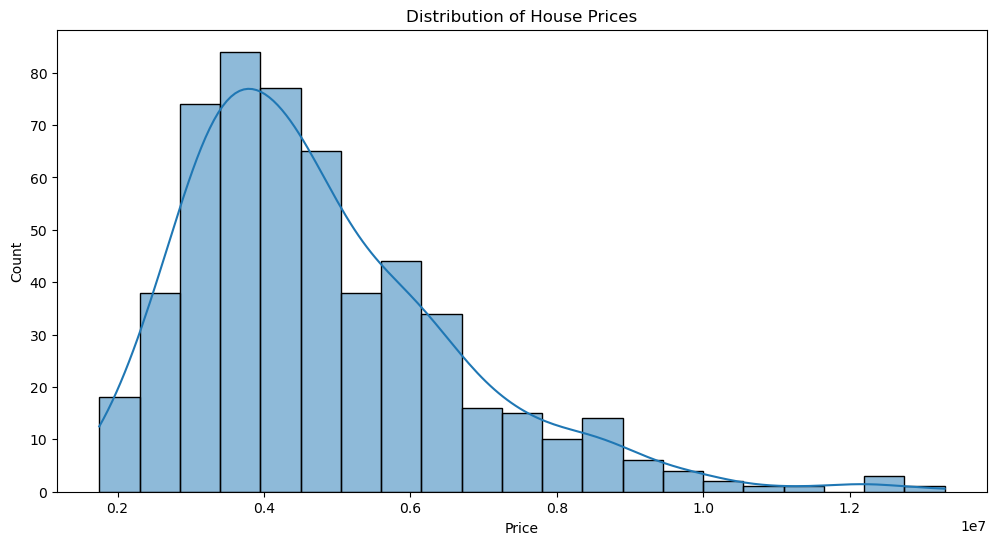

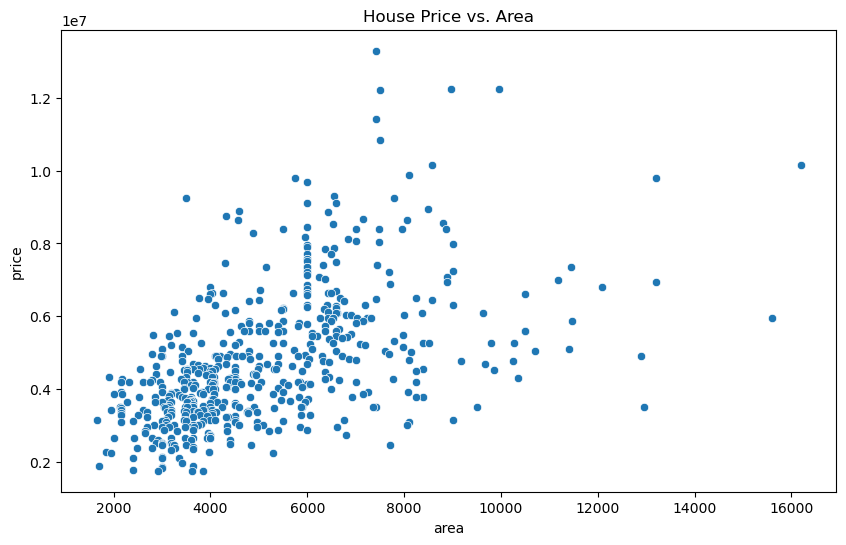

C:\Users\admin\AppData\Local\Temp\ipykernel_464\4277604207.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


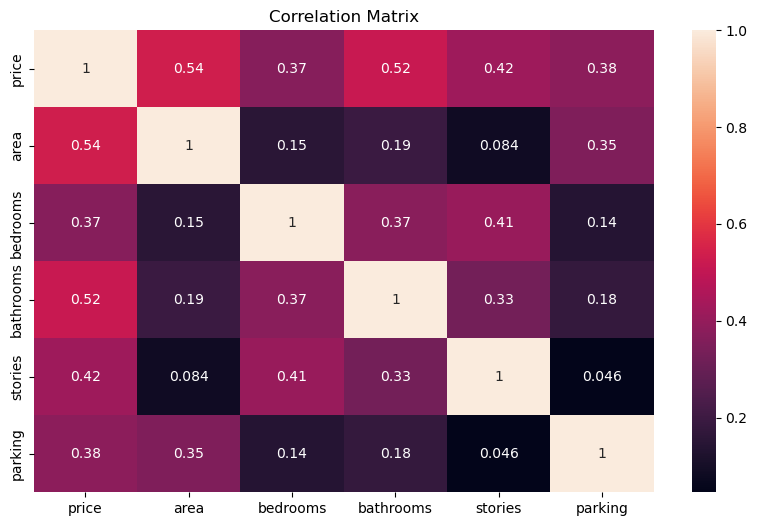

In [34]:
# QNs 3: Perform visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

# Bi-Variate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('House Price vs. Area')
plt.show()

# Multi-Variate Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Qns 4: Perform descriptive statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [36]:
# Qns 5: Check for missing values and handle them
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

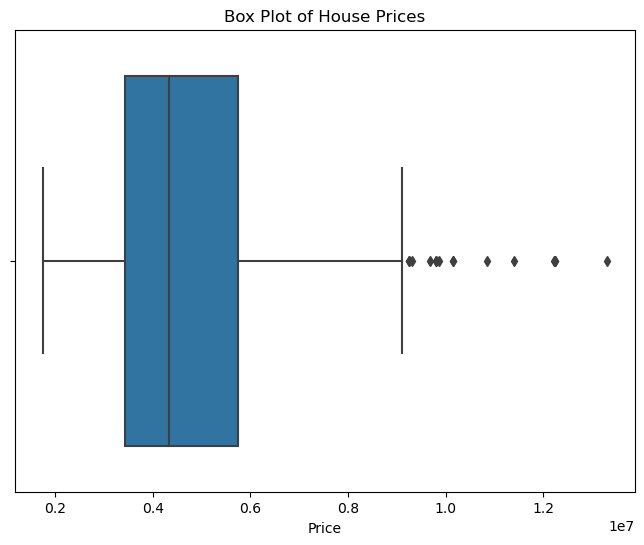

C:\Users\admin\AppData\Local\Temp\ipykernel_464\636560312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = mean_value


In [37]:
# Qns 6: Find outliers and replace them

import seaborn as sns

# Function to replace outliers with the mean value
def replace(data, outliers):
    mean_value = data.mean()
    data[outliers] = mean_value
    return data

# Find outliers in the price column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

# Calculate the upper and lower bounds for outliers using the interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find the indices of outliers
outliers = (df['price'] > upper_bound) | (df['price'] < lower_bound)

# Replace outliers in the price column with the mean value
df['price'] = replace(df['price'], outliers)

In [38]:
# Qns 7: Check for categorical columns and perform encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [39]:
# Qns 8: Split the data into dependent and independent variables
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [40]:
# Qns 9: Scale the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Qns 10: Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
# Qns 11: Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
# Qns 12: Train the model
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Qns 13: Test the model
y_pred = model.predict(X_test)
print(y_pred)

[4710703.69362575 6201897.56006442 3388171.92168578 4803198.13574555
 3370648.81632503 3632088.89874118 5349198.29025629 5551334.80618401
 2888345.43807796 2604563.17134467 8061701.98946906 3028446.82419991
 3202153.23861517 3677381.24914812 4023637.93219641 4549719.12939297
 3435842.92863694 4825078.45061738 4569047.53850254 3802973.23969473
 5428944.81927714 5562824.49370696 2968131.3264282  4493860.06347596
 5229934.40239473 6540161.93971002 3702626.82736369 5116152.85875249
 7313182.93228628 3632852.18517503 5702173.01187243 3497150.87222766
 6454741.73958573 4426562.35554473 3713896.70127337 5482554.2739001
 5157732.77618112 4588902.83560404 3165392.87014875 4232308.06017672
 4531116.76254782 3682533.89415059 6184966.89402324 4048382.75978824
 3961698.23383081 4307305.99752476 6590107.95728501 4170157.12164854
 3899529.59201871 3619996.89446539 6860053.05611472 2978320.25250747
 4310479.11121755 4692091.50577597 3967830.56443366 2649006.16970277
 6706107.45754207 3197235.92351866 

In [45]:
# Qns 14: Measure the performance using metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 946430.1393965321
Mean Squared Error (MSE): 1498043473513.141
Root Mean Squared Error (RMSE): 1223945.862165946
R-squared (R2): 0.4955827166074953
